## Проверка однородности. Зависимые выборки

Посмотрим, как применять критерии однородности для зависимых выборок. Все критерии, которые мы изучали уже реализованы в Python.

In [6]:
# как обычно, начнем с импорта нужных библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# и зафиксируем seed
np.random.seed(123)

В файле **reaction.xls** содержаться времена реакции $i$-го испытуемого на световой и звуковой сигналы соответственно. Необходимо проверить гипотезу однородности времен рекции на различные раздражители.

In [8]:
# сначала импортируем данные

data = pd.read_excel('data/reaction.xls')

In [9]:
# посмотрим на них 

data

,LIGHT,SOUND
0,176,168
1,163,215
2,152,172
3,155,200
4,156,191
5,178,197
6,160,183
7,164,174
8,169,176
9,155,155


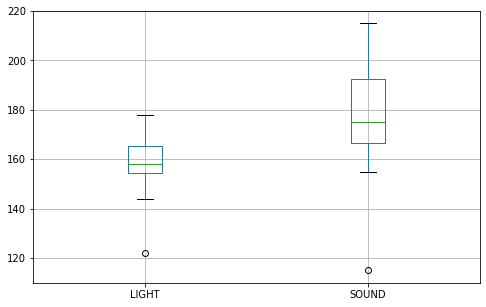

In [10]:
# Перед анализом данных полезно визулизировать данные.
# Это позволит получить какой-то априорный вывод о данных и избежать ошибок в дальнейшем 
# (например, при вызове функций с неправильными альтернативами). 
#
# Для визуализации различий лучше всего использовать "ящик с усами" (boxplot)

data.boxplot(figsize=(8,5))
plt.show()

In [11]:
# Теперь извлечем разделим данные для мальчиков и девочек.

sample1 = data['LIGHT']
sample2 = data['SOUND']

### Критерий знаков

Начнем с критерия знаков. Этот критерий предназначен для случая двух зависимых выборок и проверяет простую гипотезу о равенстве параметра сдвига $\theta$ нулю против любой альтернативы.  Он частично реализован уже в модуле statsmodels с помощью функции sign_test:

* **sign_test(sample)** — тут в качестве sample подразумевается разность двух выборок.  

К сожалению, в Python этот тест не реализован полностью: у нас нет возможности проверять односторонние альтернативы.

In [12]:
from statsmodels.stats.descriptivestats import sign_test

In [13]:
sign_test(sample1-sample2)

(-3.5, 0.0654296875)

### Критерий знаковых рангов Уилкоксона

Перейдем теперь к критерию знаковых рангов Уилкоксона. Этот критерий предназначен для случая двух зависимых выборок и проверяет простую гипотезу о равенстве параметра сдвига $\theta$ нулю против любой альтернативы. Он реализован с помощью функции wilcoxon в модуле stats:


* **stats.wilcoxon(sample1, sample2, alternative, mode)** — тут sample1 и sample2 — реализации первой и второй выборки (можно передать одним аргументом сразу их разность), alternative — альтернатива, которая используется (по умолчанию ‘two-sided’; другие варианты: ‘less’ и ‘greater’) и mode — какое нулевое распределение используется (по умолчанию “auto”; другие варианты: “exact”, “approx”).

Как упоминалось в лекции есть различные способы вычисления уровня значимости (либо точно mode=“exact”, либо с помощью нормальной аппроксимации mode=“approx”). Опция mode=“auto” использует “exact”, если $n \leq 25$ и “approx” в противном случае.

Напомним, что в критерии Уилкоксона делается дополнительное предположение о симметричности распределения остатков. Проверим это предположение визуально. 

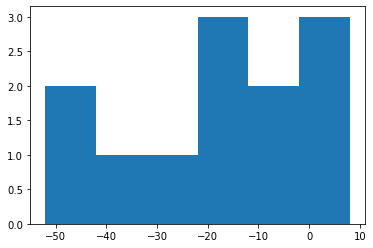

In [14]:
# посмотрим на гистограмму

plt.figure(figsize=(6,4))
plt.hist(sample1-sample2, bins=6)
plt.show()


Скорее всего, остатки не имеют симметричное распределение. Но мы все равно применим критерий Уилкоксона. 

In [15]:
stats.wilcoxon(sample1,sample2)

C:\Users\kzolo\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=4.5, pvalue=0.011197738894413023)

In [16]:
stats.wilcoxon(sample1,sample2, alternative='less')

WilcoxonResult(statistic=4.5, pvalue=0.005598869447206512)

### Критерий Стьюдента ($t$-тест)

Мы еще изучали параметрические критерии Стьюдента для зависимых выборок (Z-критерий и t-критерий). Эти критерии проверяют простую гипотезу о равенстве средних двух нормальных распределений против любой альтернативы. Z-критерий мы не будем рассматривать, так как для него необходимо знать дисперсию (которая никогда не является известной). А t-критерий частично реализован с помощью функции ttest_rel:

* **stats.ttest_rel(sample1, sample2)** — t-критерий для случая зависимых выборок. Тут sample1 и sample2 — реализации первой и второй выборки.

Различные альтернативы, к сожалению, пока не реализованы. 

Конечно, перед его применением необходимо проверить нормальность данных. Судя по построенной выше гистограмме, это предположение не выполняется. Построим еще qqplot.

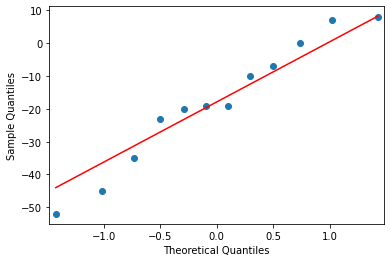

In [17]:
# посмотрим на qqplot

from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

qqplot(sample1-sample2, line='s')
plt.show()

In [18]:
# проверим нормальность и с помощью критерия Шапиро-Уилка

stats.shapiro(sample1-sample2)

ShapiroResult(statistic=0.9517226219177246, pvalue=0.6622905731201172)

In [21]:
sample1.shape

(12,)

Конечно, сомнительно применять критерий Стьюдента в данном случае. Визуальная проверка убеждает нас в том, что данные не имеют нормальное распределение. А вот критерий Шапиро-Уилка не отвергают гипотезу о нормальности данных — выборка слишком маленькая. 
  
Тем не менее попробуем применить критерий Стьюдента. 

In [19]:
stats.ttest_rel(sample1, sample2)

Ttest_relResult(statistic=-3.248672347118036, pvalue=0.007753503906276274)

Как и было сказано на лекции, параметрические критерии более чувствительные — самый маленький фактический уровень значимости получился у критерия Стьюдента. Только вот он что-то значит, только если гипотеза о нормальности данных выполняется. 

### Оценка параметра "сдвига"

С помощью "ящиков с усами" мы заметили, что реакция на световой раздражитель меньше, чем на звуковой. С помощью критериев однородности, мы убедились, что эти различия значимы (примерно на уровне 7%). Теперь давайте ответим на вопрос: а на сколько в среднем реация на световой раздражитель меньше, чем на звуковой? Для этого лучше всего использовать медиану разностей наблюдений.

In [20]:
np.median(sample2-sample1)

19.0